### Initialization

In [1]:
from polymorph_s2df import *
from polymorph_s2df.devutils import *


### Playground

In [2]:
c = Circle(2).substract(Circle(0.5)).substract(Box(2.3, 0.2).translate((1, 0)))

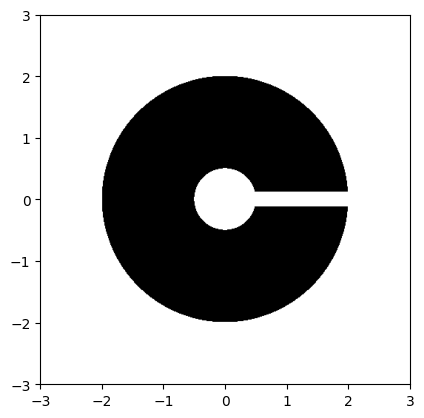

In [4]:
render(c)

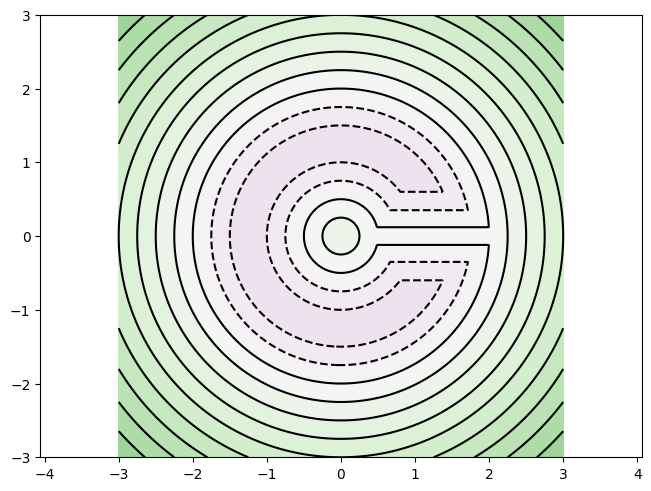

In [5]:
render_distance(c)

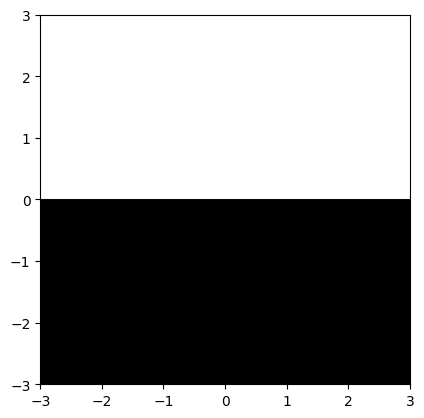

In [6]:
render(BottomHalfPlane())

In [7]:
polygon([p(2, 1.1), p(-2.1, -2), p(-1, 2.9), p(0.5, 1)])

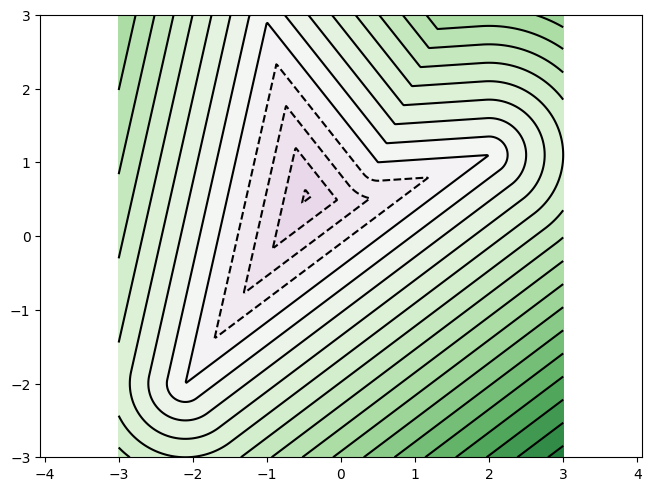

In [8]:
render_distance(polygon([p(2, 1.1), p(-2.1, -2), p(-1, 2.9), p(0.5, 1)]), [-3, 3])

For some reason I get artifacts - some points on lines perpendicular to angles seem to be set to zero.

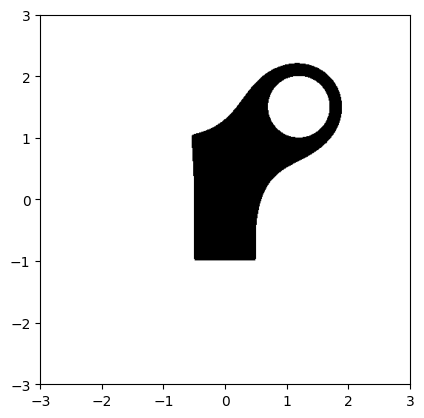

In [9]:
class Combination(Shape):
    def __init__(self, r, shape_2):
        self.r = r
        self.shape_2 = shape_2

    def distance(self, p):
        return jnp.abs(self.shape_2.distance(p)) - self.r


box = Box(1, 2)
circle = Circle(0.5).translate(p(1.2, 1.5))
shape = box.smooth_union(0.4, circle.dilate(0.2)).substract(circle)
render(shape)

In [10]:
poly = draw((-2, -2)).arc_to((0.3, 1), 0.3).arc_to((1.6, 0.4), -0.2).line_to((1, 0.5)).line_to((2.5, -2.2)).close()

print(poly)
#render(poly)

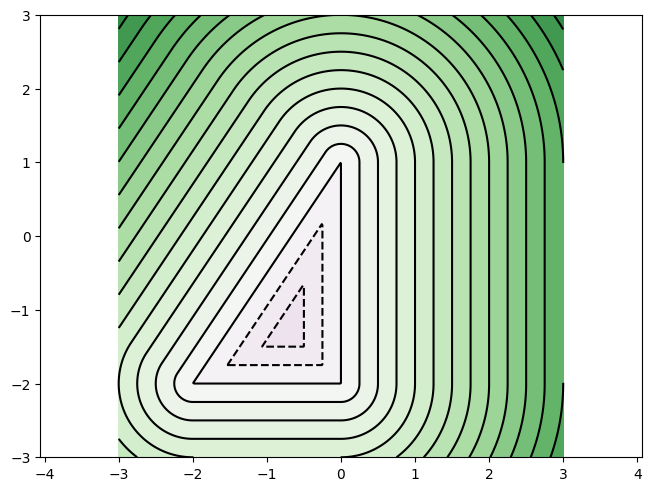

In [11]:
poly2 = draw((-2, -2)).horizontal_line(2).vertical_line(3).close()
#print(poly)
render_distance(poly2)